In [1]:
import pandas as pd
from statistics import mode

df = pd.read_excel(r'D:\\Etda_works\\Mall_Customers.xlsx', sheet_name = 'Mall_Customers')

In [2]:
# Gender
gender_count = df['Gender'].value_counts()
for gender, count in gender_count.items():
    print(f"{gender}: {count}")
print()

gen_bins = [9, 24, 40, 56, 75]
gen_labels = ['Gen Z (9-24 yrs old)', 'Millennials (24-40 yrs old)', 'Gen X (40-56 yrs old)', 'Baby Boomers (56-75 yrs old)']
df['Generation'] = pd.cut(df['Age'], bins=gen_bins, labels=gen_labels, right=False)
age_gender_count = df.groupby(['Generation', 'Gender'], observed=False).size().unstack(fill_value=0)
age_gender_count['Total'] = age_gender_count.sum(axis=1)
age_gender_count = age_gender_count.astype(int)
def format_row(row):
    return f"{row.name: <30} {str(row['Female']).center(10)} {str(row['Male']).center(10)} {str(row['Total']).center(10)}"
header = f"{'Generation': <30} {'Female'.center(10)} {'Male'.center(10)} {'Total'.center(10)}"
print(header)
print("=" * len(header))
for index, row in age_gender_count.iterrows():
    print(format_row(row))

Female: 112
Male: 88

Generation                       Female      Male      Total   
Gen Z (9-24 yrs old)               17         14         31    
Millennials (24-40 yrs old)        49         36         85    
Gen X (40-56 yrs old)              35         20         55    
Baby Boomers (56-75 yrs old)       11         18         29    


In [3]:
#Age
column = df['Age']
max = column.max()
min = column.min()  
range_val = column.max() - column.min()
median_val = column.median()
mode_val = mode(column)
print('Age Info :')
print(f"Min : {min} , Max : {max}")
print(f"ช่วง(Range) ของ Age : {range_val}")
print(f"มัธยฐาน(Median) ของ Age : {median_val}")
print(f"ฐานนิยม(Mode) ของ Age : {mode_val}")
#Male
youngest_male_age = df[df['Gender'] == 'Male']['Age'].min()
oldest_male_age = df[df['Gender'] == 'Male']['Age'].max()
# Female Age
youngest_female_age = df[df['Gender'] == 'Female']['Age'].min()
oldest_female_age = df[df['Gender'] == 'Female']['Age'].max()
print('The oldest male :', oldest_male_age)
print('The youngest male :', youngest_male_age)
print('The oldest female :', oldest_female_age)
print('The youngest female :', youngest_female_age)

Age Info :
Min : 18 , Max : 70
ช่วง(Range) ของ Age : 52
มัธยฐาน(Median) ของ Age : 36.0
ฐานนิยม(Mode) ของ Age : 32
The oldest male : 70
The youngest male : 18
The oldest female : 68
The youngest female : 18


In [4]:
#Gen Table
bins = [18, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
labels = ['18-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
gen_bins = [9, 24, 40, 56, 75]
gen_labels = ['Gen Z (9-24 yrs old)', 'Millennials (24-40 yrs old)', 'Gen X (40-56 yrs old)', 'Baby Boomers (56-75 yrs old)']
df['Generation'] = pd.cut(df['Age'], bins=gen_bins, labels=gen_labels, right=False)
gen_stats = df.groupby('Generation', observed=False).agg({
    'Spending Score (1-100)': 'mean',
    'Annual Income (k$)': 'mean'
}).reset_index()
gen_stats['Spending Score (1-100)'] = gen_stats['Spending Score (1-100)'].round(2)
gen_stats['Annual Income (k$)'] = gen_stats['Annual Income (k$)'].round(2)
def format_row(row):
    return f"{row['Generation']: <30} {str(row['Spending Score (1-100)']).center(25)} {str(row['Annual Income (k$)']).center(25)}"
header = f"{'Generation': <30} {'Spending Score (1-100)'.center(25)} {'Annual Income (k$)'.center(25)}"
print(header)
print("=" * len(header))
for index, row in gen_stats.iterrows():
    print(format_row(row))

Generation                       Spending Score (1-100)      Annual Income (k$)   
Gen Z (9-24 yrs old)                     54.29                     45.35          
Millennials (24-40 yrs old)              61.95                     67.82          
Gen X (40-56 yrs old)                    35.96                     61.53          
Baby Boomers (56-75 yrs old)             38.38                     53.69          


In [5]:
#Annual Income
column = df['Annual Income (k$)']
max = column.max()
min = column.min()
range_val = column.max() - column.min()
median_val = column.median()
mode_val = mode(column)
print('Annual Income info:')
print(f"Min : {min} , Max : {max}")
print(f"ช่วง(Range) ของ Annual Income(k$) : {range_val}")
print(f"มัธยฐาน(Median) ของ Annual Income(k$) : {median_val}")
print(f"ฐานนิยม(Mode) ของ Annual Income(k$) : {mode_val}")
#Male Income
lowest_male_income = df[df['Gender'] == 'Male']['Annual Income (k$)'].min()
highest_male_income = df[df['Gender'] == 'Male']['Annual Income (k$)'].max()
#Female Income
lowest_female_income = df[df['Gender'] == 'Female']['Annual Income (k$)'].min()
highest_female_income = df[df['Gender'] == 'Female']['Annual Income (k$)'].max()
print('The highest male income :', highest_male_income)
print('The lowest male income :', lowest_male_income)
print('The highest female income :', highest_female_income)
print('The lowest female income :', lowest_female_income)

Annual Income info:
Min : 15 , Max : 137
ช่วง(Range) ของ Annual Income(k$) : 122
มัธยฐาน(Median) ของ Annual Income(k$) : 61.5
ฐานนิยม(Mode) ของ Annual Income(k$) : 54
The highest male income : 137
The lowest male income : 15
The highest female income : 126
The lowest female income : 16


In [6]:
#Spending Score
column = df['Spending Score (1-100)']
max = column.max()
min = column.min()
range_val = column.max() - column.min()
median_val = column.median()
mode_val = mode(column)
print('Spending Score info:')
print(f"Min : {min} , Max : {max}")
print(f"ช่วง(Range) ของ Spending Score (1-100) : {range_val}")
print(f"มัธยฐาน(Median) ของ Spending Score (1-100) : {median_val}")
print(f"ฐานนิยม(Mode) ของ Spending Score (1-100) : {mode_val}")
#Male Score
lowest_male_score = df[df['Gender'] == 'Male']['Spending Score (1-100)'].min()
highest_male_score = df[df['Gender'] == 'Male']['Spending Score (1-100)'].max()
#Female Score
lowest_female_score = df[df['Gender'] == 'Female']['Spending Score (1-100)'].min()
highest_female_score = df[df['Gender'] == 'Female']['Spending Score (1-100)'].max()
print('The highest male spending score :', highest_male_score)
print('The lowest male spending score :', lowest_male_score)
print('The highest female spending score :', highest_female_score)
print('The lowest female spending score :', lowest_female_score)

Spending Score info:
Min : 1 , Max : 99
ช่วง(Range) ของ Spending Score (1-100) : 98
มัธยฐาน(Median) ของ Spending Score (1-100) : 50.0
ฐานนิยม(Mode) ของ Spending Score (1-100) : 42
The highest male spending score : 97
The lowest male spending score : 1
The highest female spending score : 99
The lowest female spending score : 5


In [7]:
#Calculate the average annual income for each age group
avg_income_by_age_group = df.groupby('Age Group', observed=True)['Annual Income (k$)'].mean().reset_index()
highest_income_group = avg_income_by_age_group.loc[avg_income_by_age_group['Annual Income (k$)'].idxmax()]
print(f"กลุ่มช่วงอายุที่มีรายได้เฉลี่ยรายปีมากที่สุด: {highest_income_group['Age Group']}")
print(f"รายได้เฉลี่ยประจำปี: {highest_income_group['Annual Income (k$)']:.2f}")

#Calculate the average spending score for each age group
avg_spending_by_age_group = df.groupby('Age Group', observed=True)['Spending Score (1-100)'].mean().reset_index()

#Find the age group with the highest average spending score
highest_spending_group = avg_spending_by_age_group.loc[avg_spending_by_age_group['Spending Score (1-100)'].idxmax()]

#Output the results without printing individual customer data
print(f"กลุ่มช่วงอายุที่มีคะแนนการใช้จ่ายมากที่สุด: {highest_spending_group['Age Group']}")
print(f"คะแนนการใช้จ่ายเฉลี่ย: {highest_spending_group['Spending Score (1-100)']:.2f}") 

กลุ่มช่วงอายุที่มีรายได้เฉลี่ยรายปีมากที่สุด: 30-35
รายได้เฉลี่ยประจำปี: 73.97
กลุ่มช่วงอายุที่มีคะแนนการใช้จ่ายมากที่สุด: 30-35
คะแนนการใช้จ่ายเฉลี่ย: 63.47


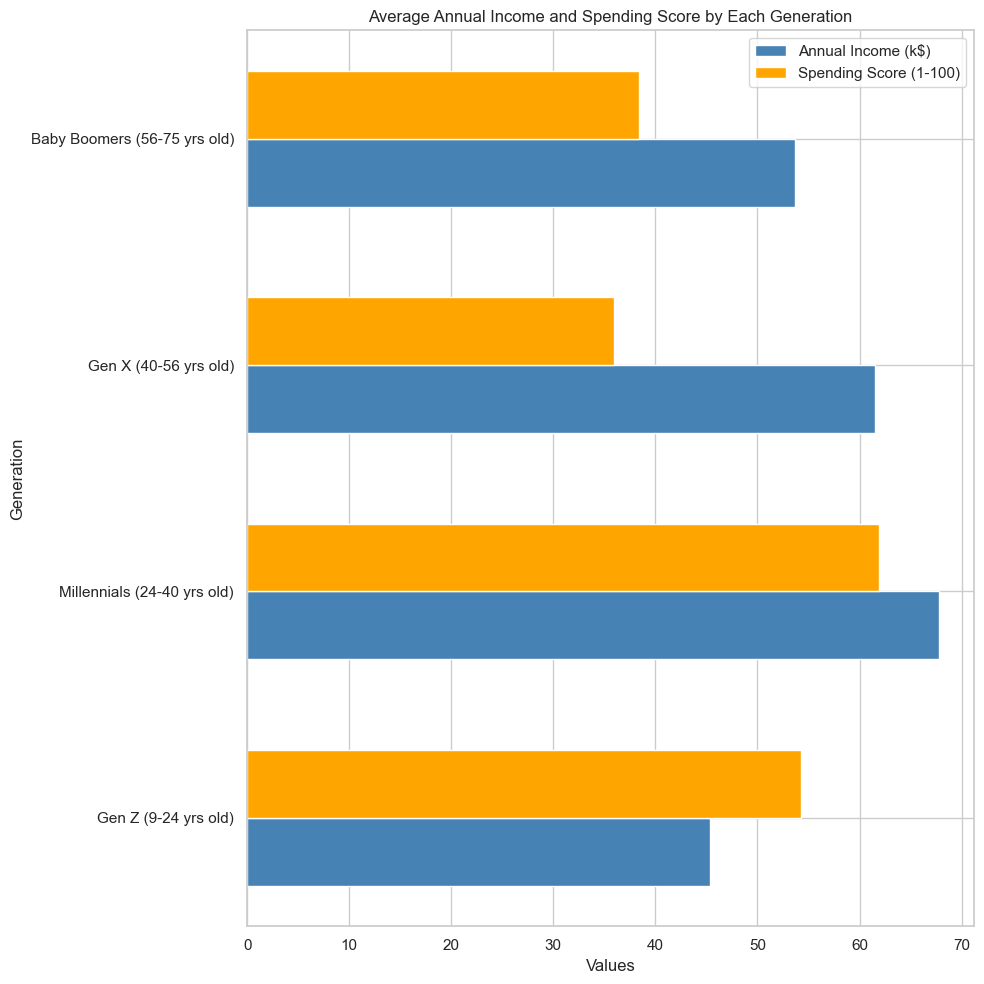

In [12]:
#Bar graph
generations = gen_stats['Generation']
income = gen_stats['Annual Income (k$)']
spending_score = gen_stats['Spending Score (1-100)']
bar_width = 0.3
index = np.arange(len(generations))
plt.figure(figsize=(10, 10))
plt.barh(index - bar_width/2, income, bar_width, color='steelblue', label='Annual Income (k$)')
plt.barh(index + bar_width/2, spending_score, bar_width, color='orange', label='Spending Score (1-100)')
plt.xlabel('Values')
plt.ylabel('Generation')
plt.title('Average Annual Income and Spending Score by Each Generation')
plt.yticks(index, generations)
plt.legend()
plt.tight_layout()
plt.show()

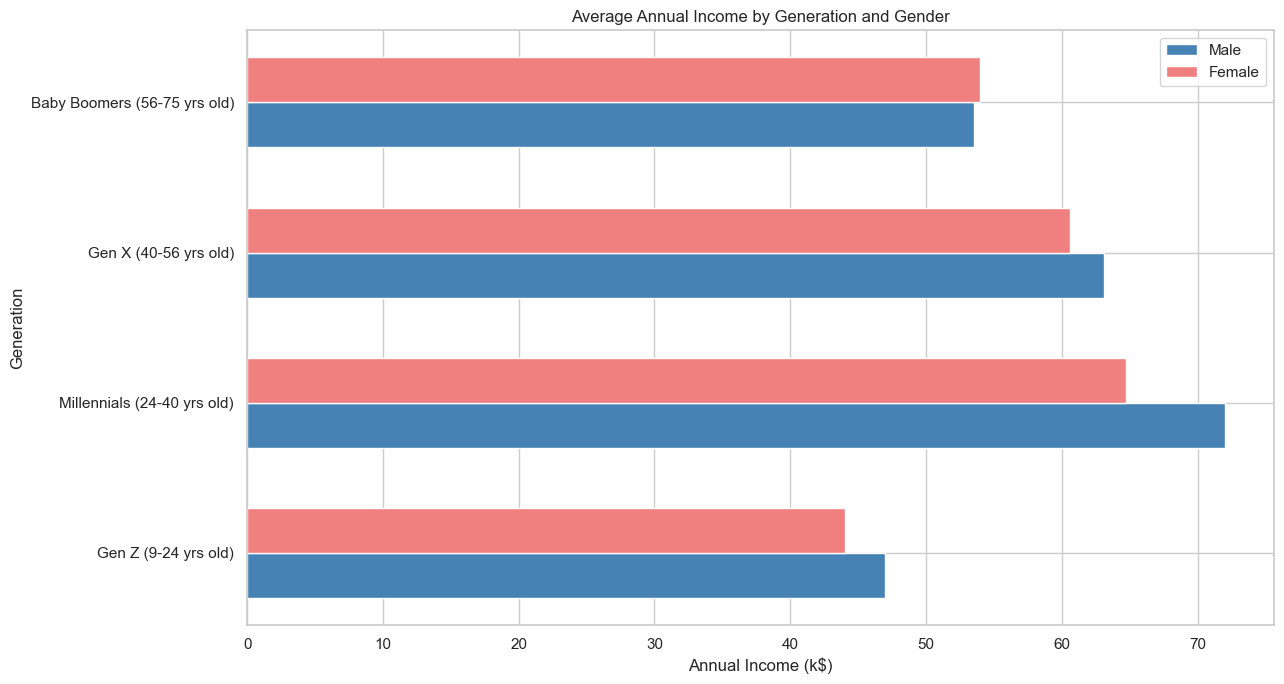

In [13]:
# Bar graph for Annual Income by Generation and Gender
income_gender = df.groupby(['Generation', 'Gender'], observed=False)['Annual Income (k$)'].mean().unstack()
bar_width = 0.3
index = np.arange(len(income_gender.index))
plt.figure(figsize=(13, 7))
plt.barh(index - bar_width/2, income_gender['Male'], bar_width, color='steelblue', label='Male')
plt.barh(index + bar_width/2, income_gender['Female'], bar_width, color='lightcoral', label='Female')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Generation')
plt.title('Average Annual Income by Generation and Gender')
plt.yticks(index, income_gender.index)
plt.legend()
plt.tight_layout()
plt.show()

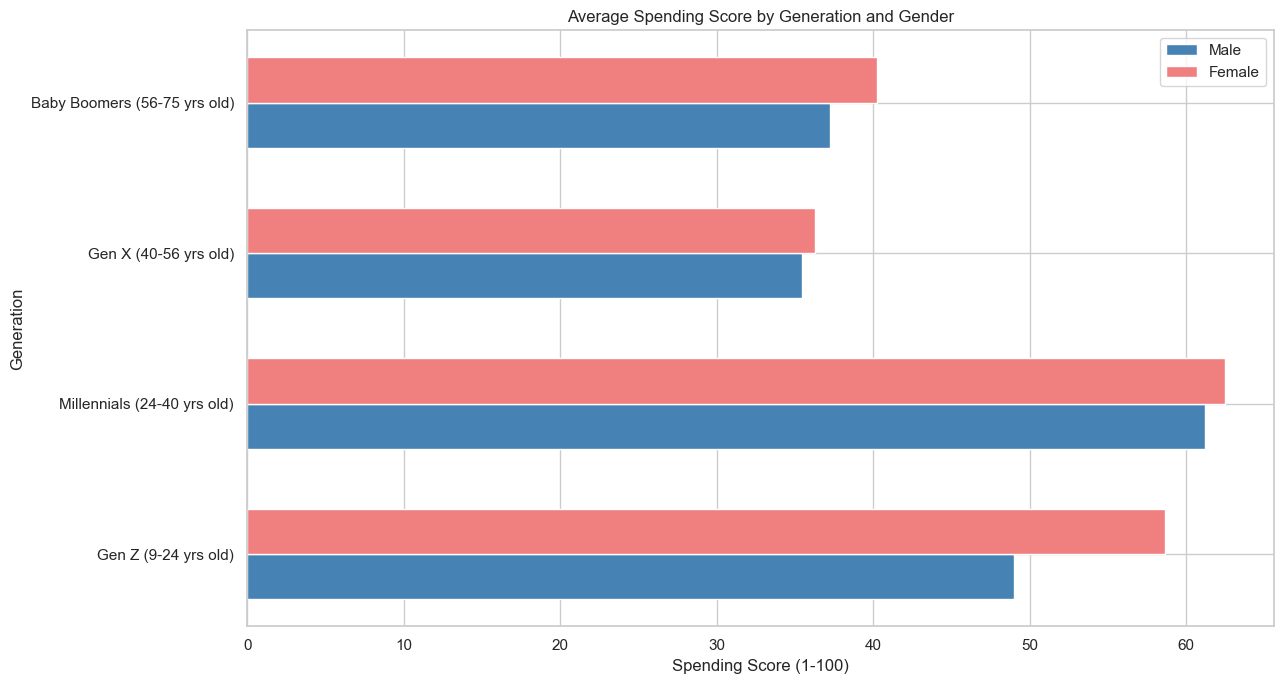

In [14]:
# Bar graph for Spending Score by Generation and Gender
genders = df['Gender'].unique()
spending_gender = df.groupby(['Generation', 'Gender'], observed=False)['Spending Score (1-100)'].mean().unstack()
bar_width = 0.3
index = np.arange(len(spending_gender.index))
plt.figure(figsize=(13, 7))
plt.barh(index - bar_width/2, spending_gender['Male'], bar_width, color='steelblue', label='Male')
plt.barh(index + bar_width/2, spending_gender['Female'], bar_width, color='lightcoral', label='Female')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Generation')
plt.title('Average Spending Score by Generation and Gender')
plt.yticks(index, spending_gender.index)
plt.legend()
plt.tight_layout()
plt.show()

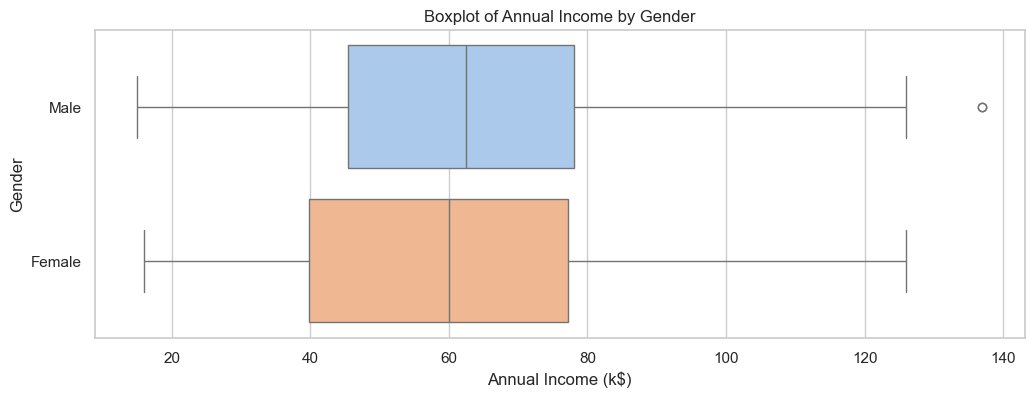

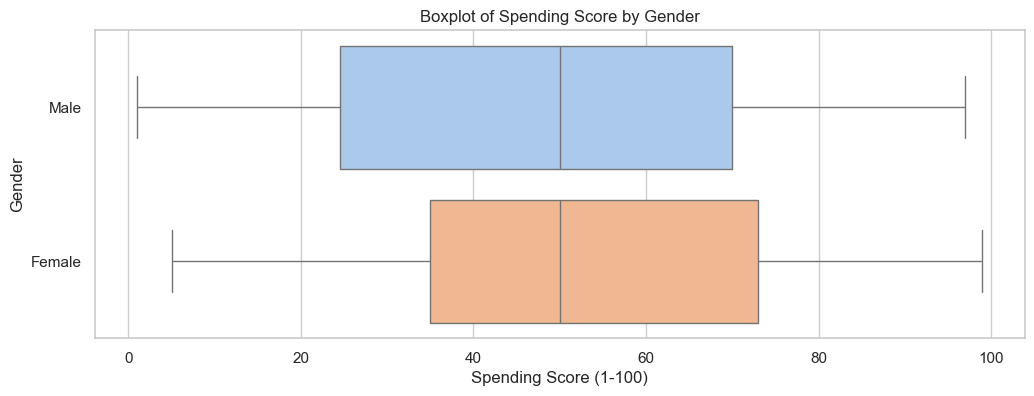

In [16]:
#Gender Box plot 
sns.set(style='whitegrid')
plt.figure(figsize=(12, 4))
sns.boxplot(y='Gender', x='Annual Income (k$)', data=df, hue='Gender', palette='pastel', dodge=False)
plt.title('Boxplot of Annual Income by Gender')
plt.legend([],[], frameon=False)
plt.show()
plt.figure(figsize=(12, 4))
sns.boxplot(y='Gender', x='Spending Score (1-100)', data=df, hue='Gender', palette='pastel', dodge=False)
plt.title('Boxplot of Spending Score by Gender')
plt.legend([],[], frameon=False)
plt.show()

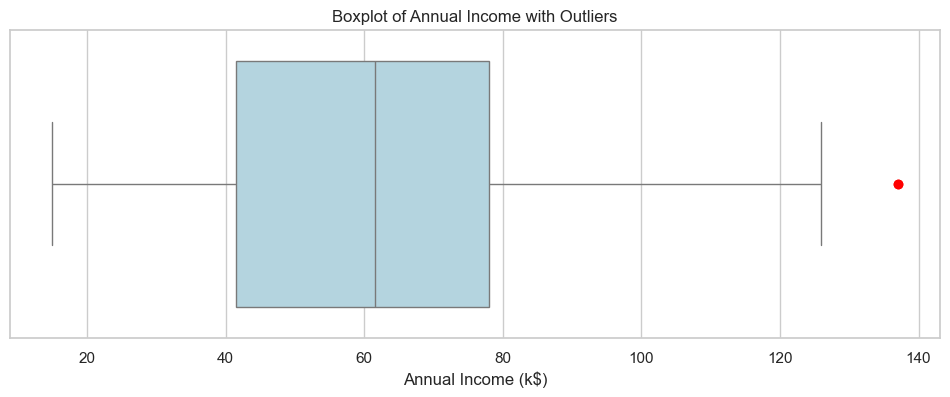

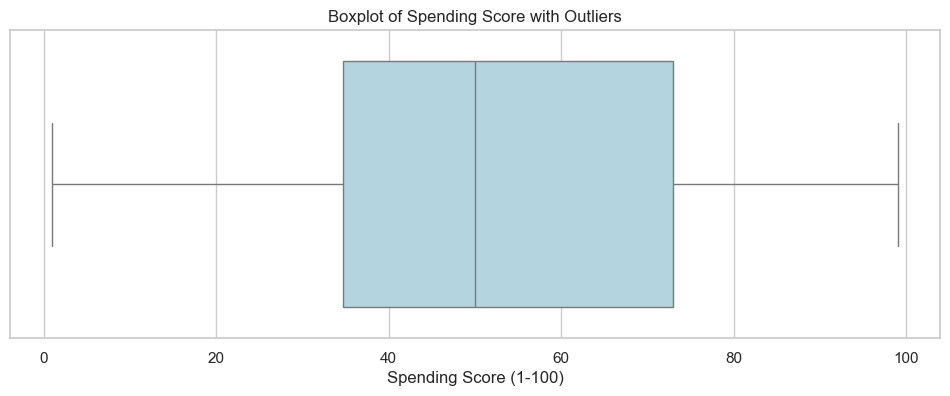

In [15]:
#Box plot and outliers
sns.set(style='whitegrid')
plt.figure(figsize=(12,4))
sns.boxplot(x='Annual Income (k$)', data=df, color='lightblue', showfliers=True, flierprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "red"})
plt.title('Boxplot of Annual Income with Outliers')
plt.show()
plt.figure(figsize=(12, 4))
sns.boxplot(x='Spending Score (1-100)', data=df, color='lightblue', showfliers=True, flierprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "red"})
plt.title('Boxplot of Spending Score with Outliers')
plt.show()

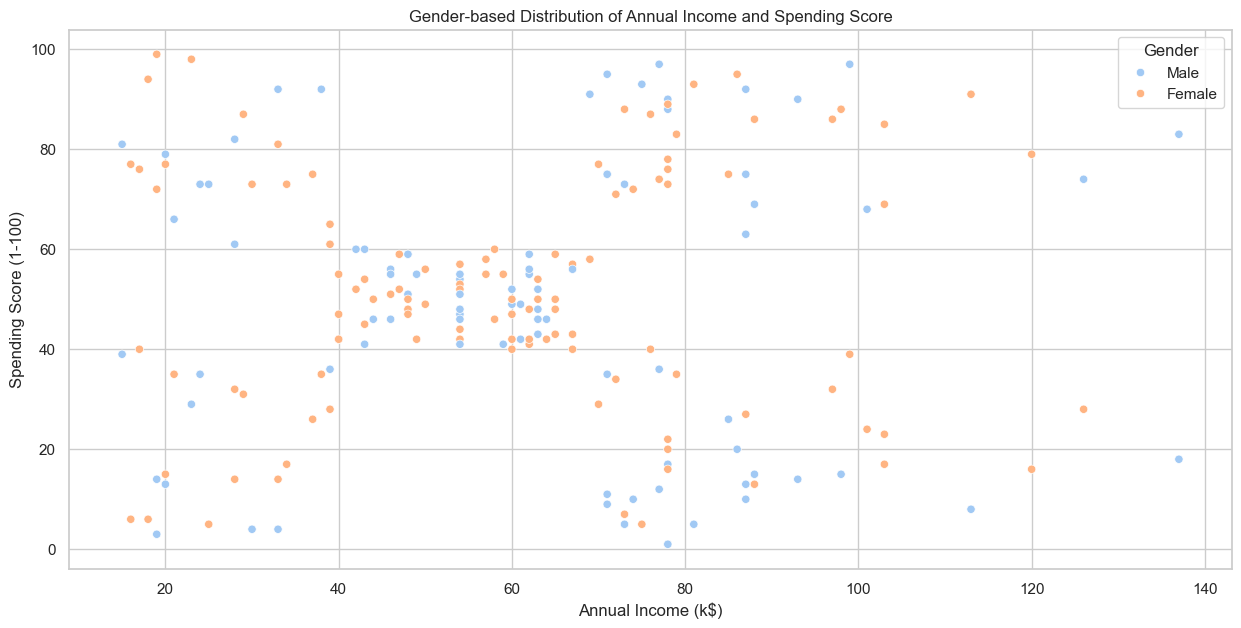

In [8]:
# Graph
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')
plt.figure(figsize=(15, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender', palette='pastel')
plt.title('Gender-based Distribution of Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender', loc='best')
plt.show()

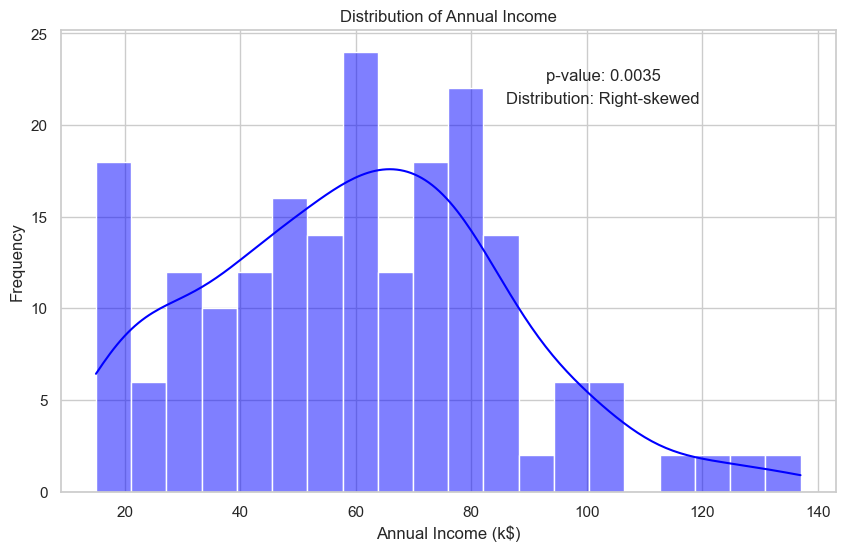

In [69]:
#Graph that shows distribution of annual income ( kde included )
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

income_column = 'Annual Income (k$)'

stat, p_value = stats.shapiro(df[income_column])

skewness = df[income_column].skew()

if p_value > 0.05:
    distribution_type = 'Normally distributed (bell-shaped)'
elif skewness > 0:
    distribution_type = 'Right-skewed'
else:
    distribution_type = 'Left-skewed'
    
plt.figure(figsize=(10,6))
sns.histplot(df[income_column], kde=True, bins=20, color='blue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

plt.text(0.7, 0.9, f'p-value: {p_value:.4f}', horizontalalignment='center',
         verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.7, 0.85, f'Distribution: {distribution_type}', horizontalalignment='center',
         verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)

plt.show()

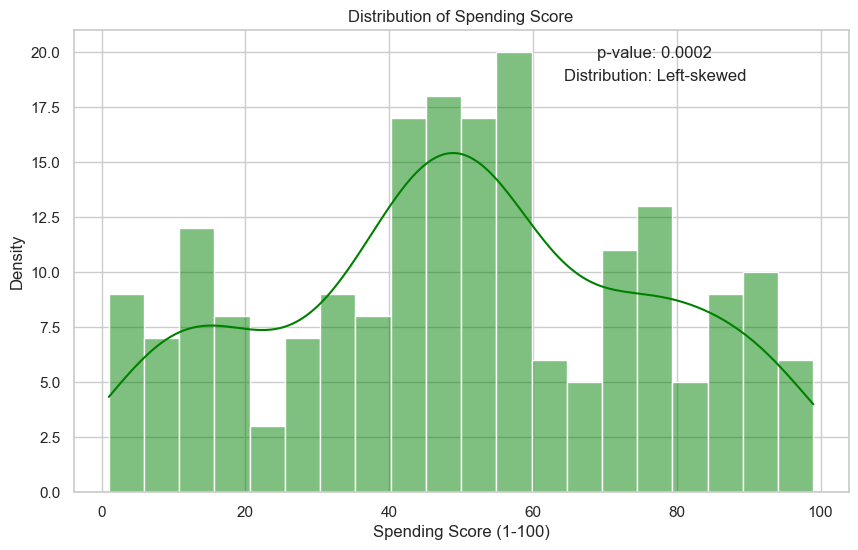

In [79]:
#Graph that show distriibution of spending score ( kde included )
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

spending_column = 'Spending Score (1-100)'
spending_data = df[spending_column].dropna()
stat, p_value = stats.shapiro(spending_data)
skewness = spending_data.skew()

if p_value > 0.05:
    distribution_type = 'Normally distributed (bell-shaped)'
elif skewness > 0:
    distribution_type = 'Right-skewed'
else:
    distribution_type = 'Left-skewed'

plt.figure(figsize=(10,6))
sns.histplot(spending_data, kde=True, bins=20, color='green')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Density')
plt.text(0.75, 0.95, f'p-value: {p_value:.4f}', horizontalalignment='center',
         verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.75, 0.90, f'Distribution: {distribution_type}', horizontalalignment='center',
         verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
plt.show()

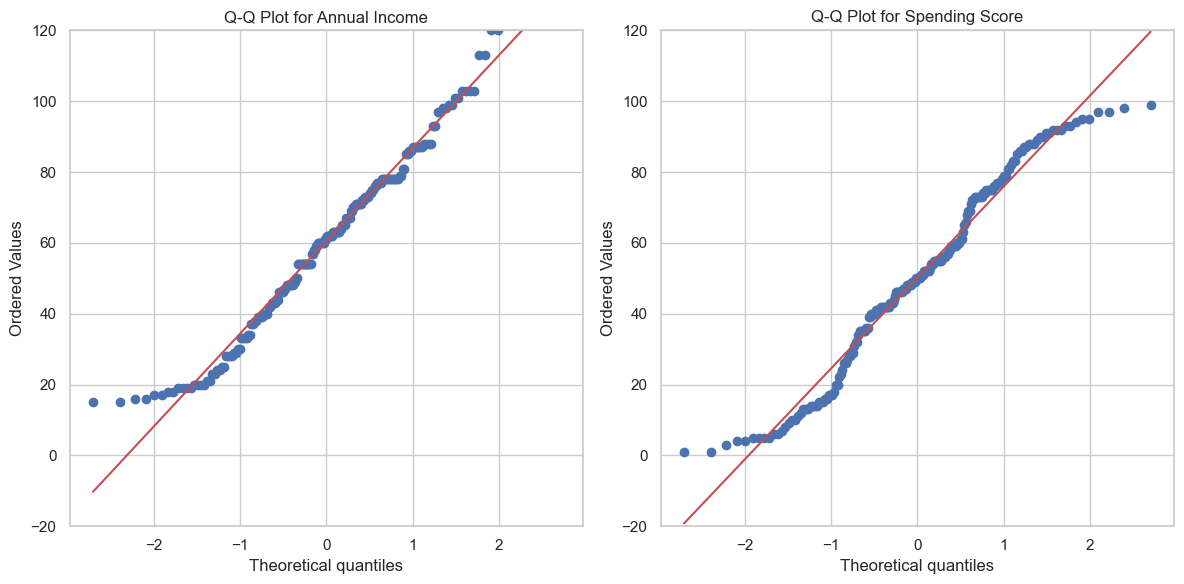

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

income_column = 'Annual Income (k$)'
spending_column = 'Spending Score (1-100)'

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(df[income_column].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot for Annual Income')
plt.ylim(-20, 120)

plt.subplot(1, 2, 2)
stats.probplot(df[spending_column].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot for Spending Score')
plt.tight_layout()
plt.ylim(-20, 120)
plt.show()

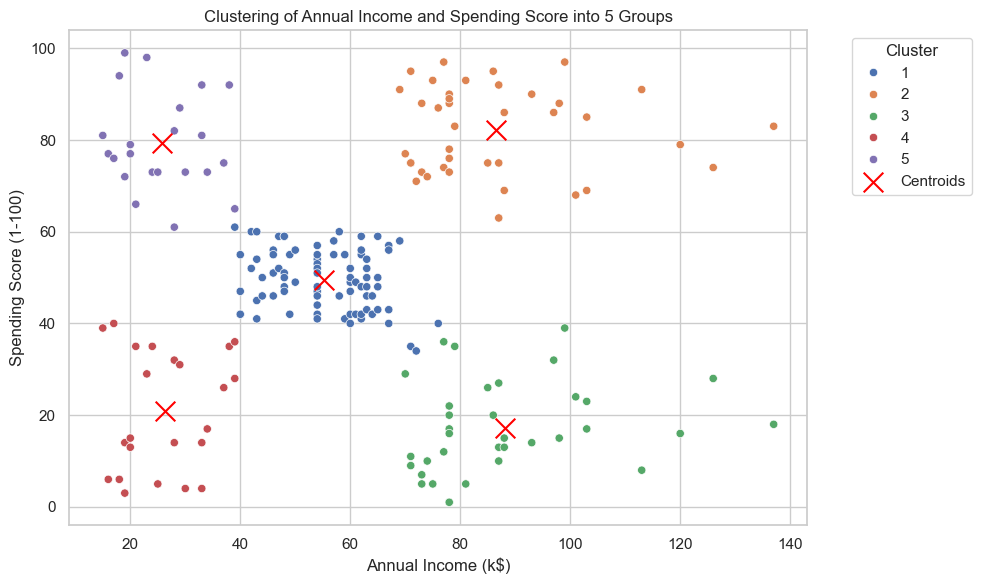

In [9]:
import os
import warnings
os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings("ignore", message=".*KMeans is known to have a memory leak.*")

# K-Means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = kmeans.fit_predict(X) + 1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Cluster', palette='deep')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='x', label='Centroids')
plt.title('Clustering of Annual Income and Spending Score into 5 Groups')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [10]:
# Cluster Table
from tabulate import tabulate
cluster_stats = df.groupby('Cluster').agg({
    'Spending Score (1-100)': 'mean',
    'Annual Income (k$)': 'mean'
}).reset_index()
cluster_stats['Spending Score (1-100)'] = cluster_stats['Spending Score (1-100)'].round(2)
cluster_stats['Annual Income (k$)'] = cluster_stats['Annual Income (k$)'].round(2)
cluster_stats['Cluster'] = cluster_stats['Cluster'].astype(int)
cluster_stats = cluster_stats.astype(str)
print('Cluster Statistics: ')
print(tabulate(cluster_stats, headers='keys', tablefmt='pretty', showindex=False))

Cluster Statistics: 
+---------+------------------------+--------------------+
| Cluster | Spending Score (1-100) | Annual Income (k$) |
+---------+------------------------+--------------------+
|    1    |         49.52          |        55.3        |
|    2    |         82.13          |       86.54        |
|    3    |         17.11          |        88.2        |
|    4    |         20.91          |        26.3        |
|    5    |         79.36          |       25.73        |
+---------+------------------------+--------------------+


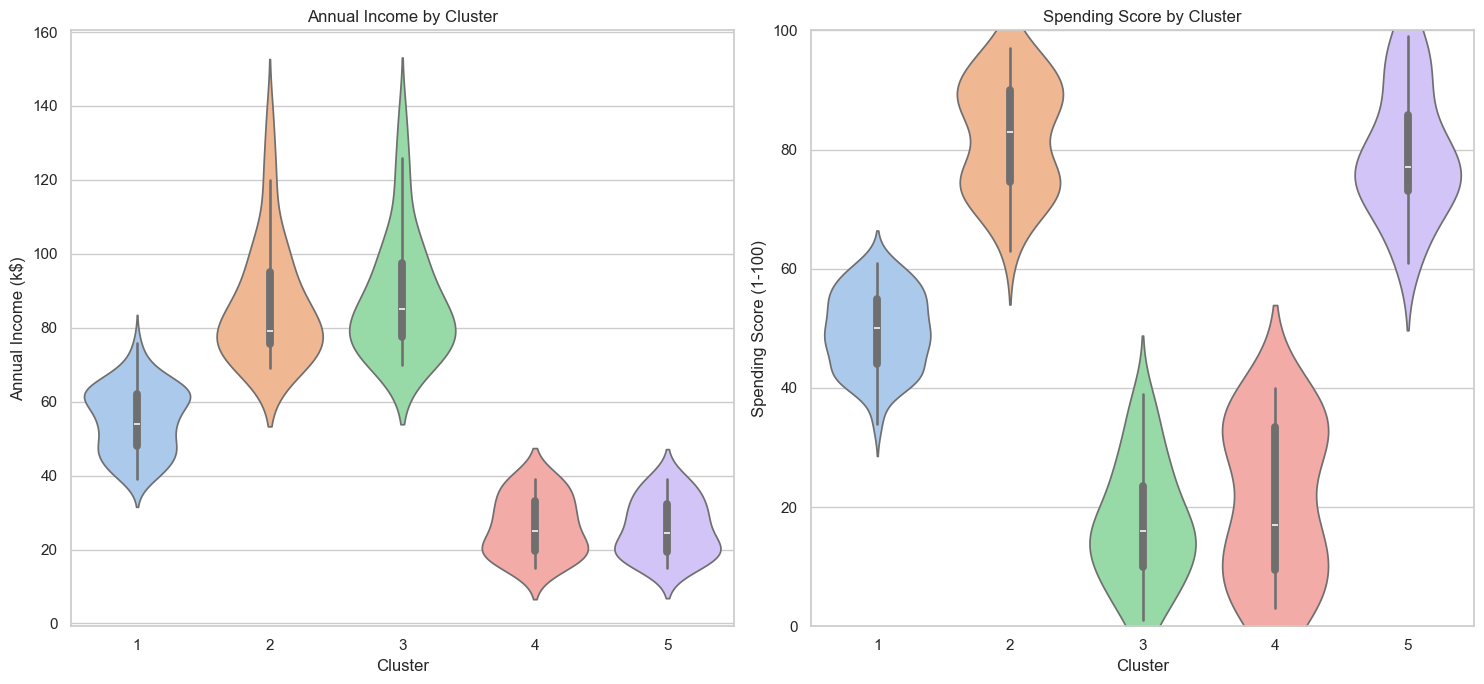

|  Cluster  |  Income Min  |  Income Max  |  Income Mean  |  Spending Min  |  Spending Max  |  Spending Mean  |
|:---------:|:------------:|:------------:|:-------------:|:--------------:|:--------------:|:---------------:|
|     1     |      39      |      76      |     55.3      |       34       |       61       |      49.52      |
|     2     |      69      |     137      |     86.54     |       63       |       97       |      82.13      |
|     3     |      70      |     137      |     88.2      |       1        |       39       |      17.11      |
|     4     |      15      |      39      |     26.3      |       3        |       40       |      20.91      |
|     5     |      15      |      39      |     25.73     |       61       |       99       |      79.36      |


In [39]:
#Cluster Graph
import os
os.environ['OMP_NUM_THREADS'] = '1'
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.violinplot(x='Cluster', y='Annual Income (k$)', data=df, hue='Cluster', palette='pastel', legend=False)
plt.title('Annual Income by Cluster')
plt.subplot(1, 2, 2)
sns.violinplot(x='Cluster', y='Spending Score (1-100)', data=df, hue='Cluster', palette='pastel', legend=False)
plt.title('Spending Score by Cluster')
plt.tight_layout()
plt.ylim(0, 100)
plt.show()

cluster_stats = df.groupby('Cluster').agg({
    'Annual Income (k$)': ['min', 'max', 'mean'],
    'Spending Score (1-100)': ['min', 'max', 'mean']
}).reset_index()
cluster_stats.columns = ['Cluster', 'Income Min', 'Income Max', 'Income Mean', 
                         'Spending Min', 'Spending Max', 'Spending Mean']
cluster_stats['Income Mean'] = cluster_stats['Income Mean'].round(2)
cluster_stats['Spending Mean'] = cluster_stats['Spending Mean'].round(2)
table = tabulate(cluster_stats, headers='keys', tablefmt='pipe', showindex=False, numalign='center', stralign='center')
print(table)